In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [3]:
def HLA(L, N, p, nn, empty):
    site = np.zeros(N, dtype=np.short)
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    cluster = np.array([sseed])
    
    per = np.array([nn[sseed, j] for j in range(4) if nn[sseed, j] != empty], dtype=int)
    site[per] = 2  
    
    while len(per) > 0:
        index = np.random.randint(len(per))
        snew = per[index]
        per = np.delete(per, index)
        escPer = np.random.random()
        if escPer < p:
            site[snew] = 1  
            cluster = np.append(cluster, snew)
            for j in range(4):
                sper = nn[snew, j]
                if sper != empty and site[sper] == 0:
                    per = np.append(per, sper)
                    site[sper] = 2  
        else:
            site[snew] = empty
        
    return site, cluster

[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[136 137 135 152 121 138 119 103 102 101 117 104 134 100  85 122 123 116
 115  84 114 130  99 131 132  83  67  82  81 129 146  65  64 162 145 148
 178 194 195 179 211 177  49 163 212 176 192 210 226 242 228 243 241 180
 240 244 245 209 224 225 181 246 230 182 165 247 183 198 197 184 167 214
 166 231 200 199 248 201 217 202 249 216 203 215 187 233 188 172 219]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  1 -1  1 -1 -1  0  0
  0  0  0  0  0  0  0  0 -1  1  1  1  1  1 -1 -1 -1  0  0  0  0  0  0  0
  0 -1 -1  1  1  1  1  1  1 -1 -1 -1  0  0  0  0  0 -1  1  1  1  1 -1  1
 -1  1  1  1 -1  0  0  0 -1  1  1  1  1 -1  1  1  1  1  1 -1  0  0  0  0
 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  0 -1  0  0  0 -1 -1  1  1 -1  1  1  1
 -1  0 

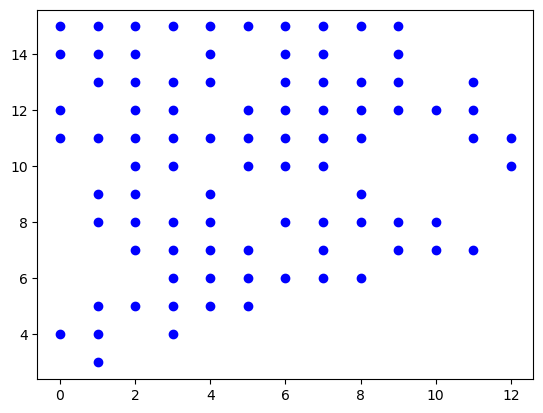

In [4]:
L = 16
p = 0.59275
N = L * L
empty = -1

nn = boundaries(L, N, empty)

site, cluster = HLA(L, N, p, nn, empty)

print(nn)
print(cluster)
print(site)

ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig, ax = plt.subplots()
ax.plot(ncluster[:, 0], ncluster[:, 1], 'bo')
plt.show()